<a href="https://colab.research.google.com/github/verasantiwijaya/MiniProject_DataMining/blob/main/checkpoint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Memahami Pola Kebiasaan Konsumen di Platform E-Commerce**

#**Import Library**

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk memberikan pemahaman terkait kebiasaan berbelanja konsumen di platform e-commerce. Hal ini dilakukan dengan mengenali siapa konsumen dari bisnis ini, menentukan waktu yang tepat untuk memberikan diskon, serta memahami tingkat kepuasan mereka. Dengan demikian, tujuan utamanya adalah menciptakan pengalaman berbelanja yang menyenangkan dengan menyesuaikan penawaran yang sesuai dengan keinginan konsumen. Selain itu, diharapkan dataset ini dapat mendukung pertumbuhan bisnis e-commerce untuk semakin berkembang.

##**Assess Situation**

Situasi bisnis yang mendasari analisis kebiasaan konsumen e-commerce adalah persaingan ketat di pasar yang terus berubah. Platform e-commerce perlu memahami lebih dalam perilaku konsumen untuk tetap relevan dan berkembang. Hal ini diperlukan untuk memandu pengambilan keputusan bisnis yang efektif dan mempertahankan daya saing di pasar yang kompetitif.

##**Data Mining Goals**

Tujuan data mining pada dataset ini adalah untuk mendapatkan pemahaman komprehensif mengenai kebiasaan berbelanja konsumen di platform e-commerce. Fokus utamanya adalah mengidentifikasi pola-pola perilaku konsumen dan faktor-faktor yang memengaruhi tingkat kepuasan mereka. Dengan demikian, hasil dari data mining ini diharapkan dapat mendukung pengembangan strategi bisnis yang lebih cerdas dan berorientasi pada konsumen dan menciptakan pengalaman berbelanja yang lebih baik

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini diawali dengan melibatkan pengumpulan data konsumen dari sumber yang telah ada. Selanjutnya melakukan pemahaman mendalam terhadap struktur dan karakteristik dataset, serta identifikasi tujuan analisis yang spesifik. Langkah selanjutnya akan fokus pada pra-pemrosesan data, termasuk pembersihan data, pengelolaan missing values, dan transformasi variabel yang diperlukan. Setelah itu, akan dilakukan pemilihan model dan pengembangan yang sesuai dengan tujuan analisis. Evaluasi model dan fine-tuning akan menjadi fokus tahap berikutnya sebelum akhirnya menyajikan hasil analisis dalam format yang jelas dan dapat dimengerti.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset ini berasal dari situs Kaggle dengan judul **E-commerce Customer Behavior Dataset**, link sumbernya dapat ditemukan di: [link dataset](https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset )

In [423]:
df = pd.read_csv('https://raw.githubusercontent.com/verasantiwijaya/MiniProject_DataMining/main/Dataset%20E-commerce.csv')
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


##**Describe Data**

####Informasi Dasar

In [424]:
print("Baris :",df.shape[0])
print("Kolom :",df.shape[1])

Baris : 350
Kolom : 11


Dari informasi yang ada, dapat disimpulkan bahwa dataset ini memiliki 350 baris dan 11 kolom yang tersedia

####Informasi Lanjutan

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


Data tersebut memiliki 11 kolom yang tersedia dengan 1 tipe data bool, 2 tipe data float, 4 tipe data int dan 4 tipe data object, informasi lebih lanjutnya dijabarkan sebagai berikut:

> **Customer ID** yakni kolom yang berisi ID unik untuk setiap pelanggan memiliki 350 baris data yang terisi dengan tipe datanya adalah	int 64-bit

> **Gender** yakni kolom yang berisi Jenis kelamin pelanggan memiliki 350 baris data yang terisi dengan tipe datanya adalah object

> **Age**	yakni kolom yang berisi Usia pelanggan memiliki 350 baris data yang terisi dengan tipe datanya adalah int 64-bit

> **City** yakni kolom yang berisi Kota tempat tinggal pelanggan memiliki 350 baris data yang terisi dengan tipe datanya adalah object

> **Membership Type** yakni kolom yang berisi Jenis keanggotaan pelanggan memiliki 350 baris data yang terisi dengan tipe datanya adalah object

> **Total Spend**	yakni kolom yang berisi Total pengeluaran pelanggan memiliki 350 baris data yang terisi dengan tipe datanya adalah float 64-bit

> **Items Purchased**	yakni kolom yang berisi Jumlah item yang dibeli pelanggan memiliki 350 baris data yang terisi dengan tipe datanya adalah int 64-bit

> **Average Rating**	yakni kolom yang berisi Rata-rata rating yang diberikan pelanggan memiliki 350 baris data yang terisi dengan tipe datanya adalah float 64-bit

> **Discount Applied** yakni kolom yang berisi apakah pelanggan memakai diskonnya?(True/False) memiliki 350 baris data yang terisi dengan tipe datanya adalah bool

> **Days Since Last Purchase**	yakni kolom yang berisi Jumlah hari sejak pembelian terakhir pelanggan memiliki 350 baris data yang terisi dengan tipe datanya adalah int 64-bit

> **Satisfaction Level** yakni kolom yang berisi Tingkat kepuasan pelanggan memiliki 348 baris data yang terisi dengan tipe datanya adalah object

####Informasi Statistik Deskriptif

In [426]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


1. **Customer ID (ID Pelanggan):**
   - **Count (Jumlah):** Terdapat 350 pelanggan dalam dataset.
   - **Mean (Rata-rata):** Rata-rata ID pelanggan adalah 275,5, menunjukkan kisaran ID yang cukup merata.
   - **Standard Deviation (Deviasi Standar):** Distribusi usia memiliki deviasi standar sekitar 4,87
   - **Min (Minimum):** ID pelanggan terkecil adalah 101.
   - **25%:** Kuartil pertama memiliki ID pelanggan sebesar 188,25.
   - **50% (Median):** ID pelanggan tengah adalah 275,5.
   - **75%:** Kuartil ketiga memiliki ID pelanggan sebesar 362,75.
   - **Max (Maksimum):** ID pelanggan terbesar adalah 450.

2. **Age (Usia):**
   - **Count (Jumlah):** Terdapat 350 pelanggan dalam dataset.
   - **Mean (Rata-rata):** Rata-rata usia pelanggan adalah sekitar 33,6 tahun.
   - **Standard Deviation (Deviasi Standar):** Distribusi usia memiliki deviasi standar sekitar 4,87
   - **Min (Minimum):** Pelanggan termuda berusia 26 tahun.
   - **25%:** Kuartil pertama memiliki usia 30 tahun.
   - **50% (Median):** Usia median adalah 32,5 tahun.
   - **75%:** Kuartil ketiga memiliki usia 37 tahun.
   - **Max (Maksimum):** Pelanggan tertua berusia 43 tahun.

3. **Total Spend (Total Belanja):**
   - **Count (Jumlah):** Terdapat 350 pelanggan dalam dataset.
   - **Mean (Rata-rata):** Rata-rata pelanggan telah menghabiskan sekitar 845,38.
   - **Standard Deviation (Deviasi Standar):** Distribusi pengeluaran memiliki deviasi standar sekitar 362,06
   - **Min (Minimum):** Total pengeluaran minimum adalah 410,8.
   - **25%:** Kuartil pertama memiliki total pengeluaran 502.
   - **50% (Median):** Total pengeluaran median adalah 775,2.
   - **75%:** Kuartil ketiga memiliki total pengeluaran 1160,6.
   - **Max (Maksimum):** Total pengeluaran maksimum adalah 1520,1.

4. **Items Purchased (Barang yang Dibeli):**
   - **Count (Jumlah):** Terdapat 350 pelanggan dalam dataset.
   - **Mean (Rata-rata):** Rata-rata pelanggan telah membeli 12,6 barang.
   - **Standard Deviation (Deviasi Standar):** Distribusi barang yang dibeli memiliki deviasi standar sekitar 4,16
   - **Min (Minimum):** Jumlah barang yang dibeli minimum adalah 7.
   - **25%:** Kuartil pertama memiliki 9 barang yang dibeli.
   - **50% (Median):** Jumlah barang yang dibeli median adalah 12.
   - **75%:** Kuartil ketiga memiliki 15 barang yang dibeli.
   - **Max (Maksimum):** Jumlah barang yang dibeli maksimum adalah 21.

5. **Average Rating (Rating Rata-rata):**
   - **Count (Jumlah):** Terdapat 350 pelanggan dalam dataset.
   - **Mean (Rata-rata):** Rating rata-rata yang diberikan oleh pelanggan adalah sekitar 4,02.
   - **Standard Deviation (Deviasi Standar):** Distribusi rating memiliki deviasi standar sekitar 0,58.
   - **Min (Minimum):** Rating minimum adalah 3.
   - **25%:** Kuartil pertama memiliki rating 3,5.
   - **50% (Median):** Rating median adalah 4,1.
   - **75%:** Kuartil ketiga memiliki rating 4,5.
   - **Max (Maksimum):** Rating maksimum adalah 4,9.

6. **Days Since Last Purchase (Hari Sejak Pembelian Terakhir):**
   - **Count (Jumlah):** Terdapat 350 pelanggan dalam dataset.
   - **Mean (Rata-rata):** Rata-rata sudah sekitar 26,59 hari sejak pembelian terakhir pelanggan.
   - **Standard Deviation (Deviasi Standar):** Distribusi hari sejak pembelian terakhir memiliki deviasi standar sekitar 13,44.
   - **Min (Minimum):** Jumlah hari terkecil sejak pembelian terakhir adalah 9 hari.
   - **25%:** Kuartil pertama memiliki 15 hari sejak pembelian terakhir.
   - **50% (Median):** Median adalah 23 hari sejak pembelian terakhir.
   - **75%:** Kuartil ketiga memiliki 38 hari sejak pembelian terakhir.
   - **Max (Maksimum):** Jumlah hari terbesar sejak pembelian terakhir adalah 63 hari.

##**Exploratory Data Analysis**

<ipython-input-427-20c6003c1394>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




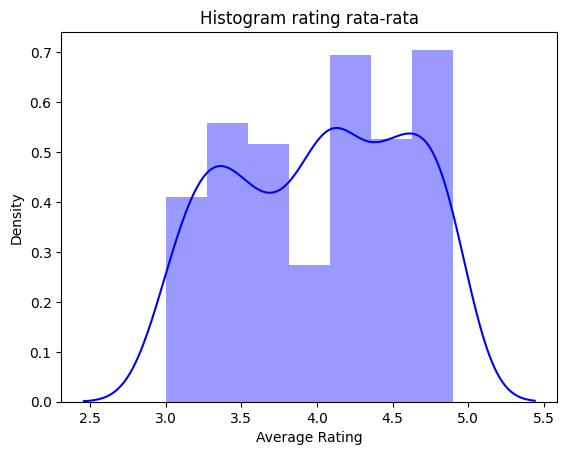

In [427]:
fig, ax = plt.subplots()

sns.distplot(df['Average Rating'],
            kde=True,
            color="b")

plt.title('Histogram rating rata-rata')
plt.show()

Histogram tersebut memberikan gambaran megenai distribusi rating pada E-Commerce. yang mana sumbu x adalah Average ratingnya dan sumbu y adalah kepadatan datanya. Rata-rata (mean) rating E-commerce adalah 3,8, menunjukkan bahwa secara keseluruhan, situs tersebut mendapat penilaian yang relatif tinggi dari penggunanya. Median rating, yang berada pada 3,9, mengindikasikan bahwa separuh pengguna memberikan rating di atas 3,9 dan separuhnya memberikan rating di bawahnya. Modus rating E-commerce adalah 4,2, menunjukkan bahwa rating 4,2 paling sering diberikan oleh pengguna.

Dalam hal skewness, distribusi rating E-commerce cenderung miring ke kiri. Ini menandakan bahwa lebih banyak pengguna yang memberikan rating tinggi daripada yang memberikan rating rendah. Sebagai tambahan, kurtosis distribusi rating sedikit lebih tinggi dari distribusi normal, menunjukkan bahwa lebih banyak pengguna memberikan rating rata-rata daripada memberikan rating ekstrim (sangat tinggi atau sangat rendah). Dengan informasi ini, kita dapat menyimpulkan bahwa E-commerce tersebut cenderung mendapatkan penilaian positif dari mayoritas penggunanya, dengan kebanyakan rating berada di kisaran rata-rata.

**Interpretasi :**

> Interpretasi dari rata-rata dan median rating yang tinggi menunjukkan bahwa E-commerce ini diterima dengan baik oleh pengguna. Modus rating yang tinggi juga menandakan bahwa mayoritas pengguna puas dengan layanan yang diberikan oleh E-commerce tersebut. Distribusi rating yang sedikit miring ke kiri mengindikasikan bahwa sebagian besar pengguna merasa puas dengan E-commerce, dengan lebih sedikit yang tidak puas.

**Solusi :**

> Namun, distribusi rating yang sedikit lebih kurtosis menggambarkan bahwa ada sejumlah pengguna yang memberikan rating netral. Oleh karena itu, E-commerce bisa mempertimbangkan untuk melakukan survei lebih lanjut guna memahami preferensi dan ketidakpuasan pengguna dengan lebih baik. Dengan mengumpulkan umpan balik lebih rinci, E-commerce dapat mengidentifikasi area yang perlu diperbaiki atau ditingkatkan.

<ipython-input-428-e14d480923de>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-428-e14d480923de>:4: UserWarning:

The palette list has more values (350) than needed (6), which may not be intended.



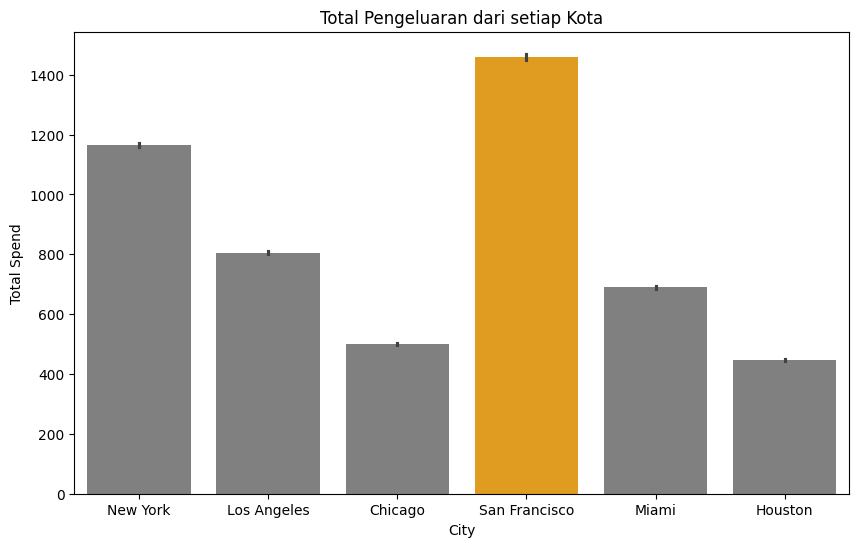

In [428]:
cols = ['grey' if x < max(df['City']) else 'orange' for x in df['City']]

plt.figure(figsize=(10, 6))
sns.barplot(x=df['City'], y=df['Total Spend'], palette=cols)

plt.title('Total Pengeluaran dari setiap Kota')
plt.xlabel('City')
plt.ylabel('Total Spend')
plt.show()

Bar chart tersebut mengidentifikasi kan Total Pengeluaran pelanggan dari Setiap Kota di E-commerce. Setiap batang dalam sumbu x mewakili nama kota dan sumbu y mewakili total pengeluaran pelanggan dalam bentuk dollar. Warna kuning tua dipilih untuk menyoroti pengeluaran pelanggan di Kota San Francisco sebagai kota yang paling tinggi nilai pengeluarannya yakni diatas 1400. Rata-rata total pengeluaran di enam kota mencapai 866.67, sementara mediannya berada pada angka 800. Dan simpangan bakunya mencapai 321.47

**Interpretasi :**

>Kota dengan total pengeluaran tertinggi adalah San Francisco, dapat dikenali dari warna batangnya yang mencolok, yakni warna kuning tua, yang berbeda dengan warna batang lainnya. Dengan melihat rata-rata total pengeluaran di enam kota kita dapat menyimpulkan bahwa secara umum, pengeluaran pelanggan cenderung tinggi. Median yang ada menunjukkan bahwa distribusi pengeluaran tidak terlalu terpengaruh oleh nilai-nilai ekstrem. Meskipun demikian, simpangan baku yang tinggi menunjukkan variasi yang signifikan dari nilai-nilai rata-rata, yang dapat diartikan bahwa ada ketidaksetaraan yang besar dalam pengeluaran pelanggan di antara kota-kota tersebut.

**Solusi :**

>Untuk meningkatkan kinerja, strategi pemasaran dapat diarahkan ke analisis mendalam faktor-faktor penyebab perbedaan, memungkinkan penyesuaian strategi pemasaran berbasis kota dan pengembangan produk yang sesuai dengan preferensi setiap kota untuk mendukung pertumbuhan dan keberlanjutan bisnis e-commerce.

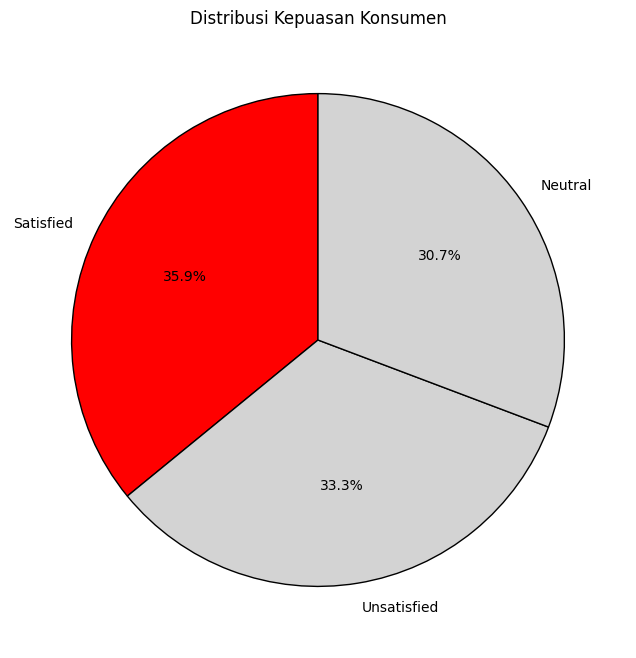

In [429]:
satisfaction_count = df['Satisfaction Level'].value_counts().sort_values(ascending=False)

max_percentage_index = satisfaction_count.idxmax()
highlight_color = ['red' if idx == max_percentage_index else 'lightgrey' for i, idx in enumerate(satisfaction_count.index)]

plt.figure(figsize=(8, 8))
pie_chart = plt.pie(satisfaction_count, labels=satisfaction_count.index, autopct='%1.1f%%', startangle=90, colors=highlight_color)

for wedge in pie_chart[0]:
    wedge.set_edgecolor('black')

plt.title('Distribusi Kepuasan Konsumen')
plt.show()

Pie chart ini menjelaskan mengenai presentase kepuasan yang dimiliki oleh konsumen E-commerce, terdapat 3 utama kategori didalam pembagiannya yakni, Neutral pemilik presentase terendah sebesar 30.7%, disusul dengan Unsatisfied sebesar 33.3%, dan kategori dengan nilai presentase tertinggi dimiliki oleh Satisfied sebesar 35.9% untuk memudahkan visualisasi maka satisfied sebagai nilai tertinggi memiliki warna mencolok dibandingkan dengan kategori lain.

**Interpretasi :**

>Sebanyak 35.9% konsumen menyatakan kepuasan mereka, menandakan bahwa mayoritas pengguna merasa puas dengan layanan yang mereka terima. Ini mungkin disebabkan oleh pengalaman berbelanja yang lancar dan memuaskan. Meskipun demikian, sebanyak 30.7% konsumen memiliki sikap netral, menunjukkan bahwa sebagian besar dari mereka tidak memiliki persepsi yang kuat terhadap pengalaman belanja online. Sementara itu, 33.3% konsumen menyatakan ketidakpuasan, yang mungkin dapat disebabkan oleh masalah dan faktor lain yang tidak memuaskan

**Solusi :**
>meningkatkan faktor yang memungkinkan konsumen merasa senang dengan begitu, diharapkan perusahaan dapat meningkatkan tingkat kepuasan konsumen, mengubah sikap netral menjadi positif, dan secara signifikan mengurangi persentase konsumen yang merasa tidak puas.

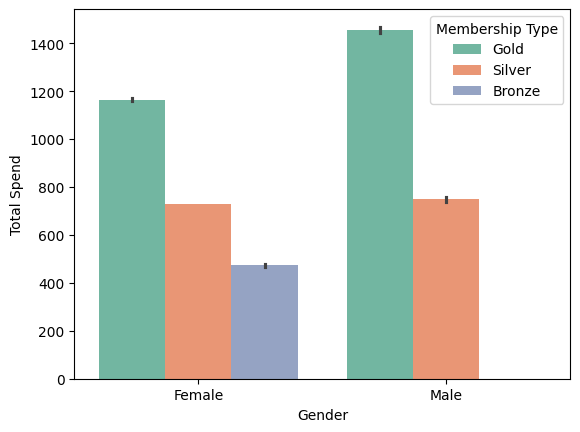

In [430]:
fig, ax = plt.subplots()
sns.barplot(x="Gender",
            y="Total Spend",
            hue="Membership Type",
            data=df,
            palette="Set2")

plt.show()

Sumbu x (sumbu horizontal) dari plot akan mewakili data untuk "Gender" atau jenis kelamin.  Sumbu y (sumbu vertikal) dari plot akan mewakili data untuk "Total Spend" atau total pengeluaran konsumen. data kemudian dikelompokkan berdasarkan jenis keanggotaan (Silver, Gold, dan Platinum), setiap jenis keanggotaan akan ditunjukkan dengan warna yang berbeda pada plot.

Groped barchart tersebut memvisualisasikan korelasi variabel pengeluaran total pada e-commerce terhadap variabel gender dan kemudian dibagi berdasarkan tipe membershipnya

**Interpretasi :**

> Dapat disimpulkan bahwa keanggotaan Gold memiliki total pengeluaran tertinggi dibandingkan dengan jenis keanggotaan lainnya. Pertama, perlu dicatat bahwa gender wanita memiliki kecenderungan untuk memiliki lebih banyak jenis keanggotaan (Gold, Silver, Bronze) dibandingkan dengan gender pria, yang hanya memiliki dua jenis keanggotaan (Gold dan Silver). Selanjutnya, pada jenis keanggotaan Silver, baik wanita maupun pria memiliki total pengeluaran yang hampir serupa, yaitu sekitar 700 dollar. Secara keseluruhan, dapat disimpulkan bahwa keanggotaan Gold menonjol sebagai yang memiliki total pengeluaran paling tinggi, sementara wanita cenderung memiliki lebih banyak variasi dalam jenis keanggotaan dibandingkan dengan pria.

**Solusi :**

>Strategi dapat difokuskan pada meningkatkan keanggotaan Gold yang sebelumnya terpantau mendominasi. Wanita cenderung memiliki lebih banyak variasi keanggotaan dibandingkan pria, sehingga melakukan penyesuaian strategi pemasaran demi menarik lebih banyak pria ke dalam program keanggotaan.


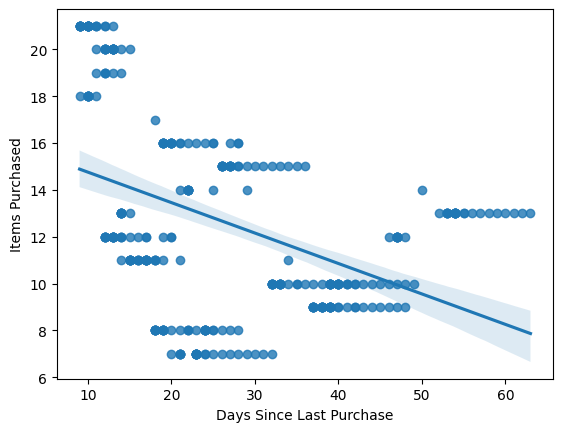

In [431]:
fig, ax = plt.subplots()

sns.regplot(x="Days Since Last Purchase",
            y="Items Purchased",
            data=df,
            ax=ax)

plt.show()

Scatter chart di atas menunjukkan hubungan antara jumlah item yang dibeli dan jumlah hari sejak pembelian terakhir. Sumbu x berarti Jumlah hari sejak pembelian terakhir (dalam rentang 0 hingga 60 hari) dan sumbu y berarti Jumlah item yang dibeli (dalam rentang 0 hingga 20 item)

Setiap titik pada scatter chart mewakili satu data point. Posisi titik menunjukkan nilai kedua variabel untuk data point tersebut. seperti titik di koordinat (20, 12) menunjukkan bahwa 12 item dibeli 20 hari setelah pembelian terakhir. Secara umum, scatter chart menunjukkan tren penurunan jumlah item yang dibeli seiring dengan bertambahnya jumlah hari sejak pembelian terakhir. seperti Pada 10 hari pertama setelah pembelian terakhir, rata-rata 15 item dibeli. Pada 40 hari setelah pembelian terakhir, rata-rata hanya 5 item dibeli.

meskipun terdapat tren penurunan, terdapat beberapa pola lain yang dapat diamati yakni pada Pola lonjakannya Pada beberapa hari, terdapat lonjakan pembelian, seperti pada hari ke-20 dan ke-50. dan pada Pola outlier Ada beberapa data point yang jauh dari tren umum, seperti data point di koordinat (40, 18).

**Interpretasi :**
>Scatter chart tersebut menunjukkan bahwa terdapat hubungan negatif antara jumlah item yang dibeli dan jumlah hari sejak pembelian terakhir. Semakin lama waktu yang berlalu sejak pembelian terakhir, semakin sedikit item yang dibeli.

**Solusi:**
> Dalam interpretasi, terlihat adanya hubungan negatif antara jumlah item yang dibeli dan jumlah hari sejak pembelian terakhir, menunjukkan penurunan pembelian seiring bertambahnya waktu. Untuk mengatasi pola tersebut, dapat dilakukan identifikasi penyebab lonjakan pembelian pada hari tertentu, pemanfaatan strategi promosi pada hari-hari khusus, analisis data outlier,

##**Verify Data Quality**

####Missing Values

In [432]:
df.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

Berdasarkan indormasi diatas terdapat 2 nilai yang hilang/kosong pada kolom Satisfaction Level, sedangkan untuk kolom yang lain terbebas dari nilai hilang

####Outliers Values

In [433]:
results = []

cols =df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 =df[col].quantile(0.25)
  q3 =df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers =df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
resultsdf = pd.DataFrame(results)
resultsdf.set_index('Kolom', inplace=True)
resultsdf = resultsdf.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(resultsdf)

Kolom,Persentase Outliers
Customer ID,0.0
Age,0.0
Total Spend,0.0
Items Purchased,0.0
Average Rating,0.0
Days Since Last Purchase,0.0


Dengan persentase outliers sebesar 0.0 untuk setiap kolom, yang artinya tidak ada outliers yang terdeteksi dalam kolom tersebut. Berdasarkan analisis outliers ini, dataset dapat dianggap relatif bersih dari nilai-nilai yang sangat ekstrim atau anomali di setiap kolom.

####Duplicated Values

In [434]:
df[df.duplicated()]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level


In [435]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
345    False
346    False
347    False
348    False
349    False
Length: 350, dtype: bool

Berdasarkan analisis dari informasi yang ada, dapat disimpulkan dataset terbebas dari nilai data yang terduplikasi

####Inconsistent Values / Noise (Optional)

In [436]:
#PENGECEKKAN PERTAMA
#mengecek potensial anomali atau nilai tidak terduga
kolom_kategorikal = ['City', 'Gender', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level']

for kolom in kolom_kategorikal:
    nilai_unik = df[kolom].unique()
    print(f"Nilai unik dalam kolom {kolom}:", nilai_unik)

    if df[kolom].dtype == 'object':
        unexpected_values = df[df[kolom].str.strip() == '']
        if not unexpected_values.empty:
            print(f"Potensial data tidak sesuai dalam kolom {kolom}:", unexpected_values)
    else:
        unexpected_values = df[df[kolom] < 0]
        if not unexpected_values.empty:
            print(f"Potensial data tidak sesuai dalam kolom {kolom}:", unexpected_values)


Nilai unik dalam kolom City: ['New York' 'Los Angeles' 'Chicago' 'San Francisco' 'Miami' 'Houston']
Nilai unik dalam kolom Gender: ['Female' 'Male']
Nilai unik dalam kolom Membership Type: ['Gold' 'Silver' 'Bronze']
Nilai unik dalam kolom Total Spend: [1120.2   780.5   510.75 1480.3   720.4   440.8  1150.6   800.9   495.25
 1520.1   690.3   470.5  1200.8   820.75  530.4  1360.2   700.6   450.9
 1170.3   790.2   505.75 1470.5   710.4   430.8  1140.6   810.9   485.25
 1500.1   670.3   460.5  1190.8   830.75  520.4  1370.2   690.6   440.9
 1160.3   800.2   500.75 1460.5   700.4   420.8  1130.6   820.9   480.25
 1490.1   680.3  1180.8  1420.8   730.4   450.6  1210.6   780.9  1390.2
  670.6   460.9   810.2   515.75 1450.5   690.4   525.75  830.9   490.25
 1480.1   480.5  1170.8  1440.5   410.8  1160.6   660.3   430.5   780.2
  450.8   475.25  770.2   440.5 ]
Nilai unik dalam kolom Items Purchased: [14 11  9 19 13  8 15 12 10 21  7 16 18 20 17]
Nilai unik dalam kolom Average Rating: [4.6 4.1

In [437]:
#PENGECEKKAN KEDUA
#Memeriksa apakah nilai di beberapa kolom kurang dari 0 untuk setiap baris
selected_columns = ["Age", "Total Spend", "Items Purchased", "Average Rating", "Days Since Last Purchase"]
mask_negative_age = (df[selected_columns] < 0).any(axis=1)
print(mask_negative_age)

0      False
1      False
2      False
3      False
4      False
       ...  
345    False
346    False
347    False
348    False
349    False
Length: 350, dtype: bool


Berdasarkan dua pengecekan di atas, yaitu pengecekan pertama berupa potensial data yang tidak sesuai dalam kolom, tidak ada indikasi bahwa dataset ini berpotensi memiliki nilai tak terduga dari kategori string maupun numerik. Selain itu, tidak terdapat data yang aneh di dalam setiap nilai unik yang dimilikinya.

Pengecekan kedua, yaitu pengecekan terhadap kemungkinan adanya angka negatif di kolom-kolom numerik yang seharusnya tidak memiliki nilai negatif, menunjukkan bahwa tidak ada data yang demikian.

#**DATA CLEANING**

##**Penanganan Missing Values**

###**Pengecekkan Missing Values**

In [438]:
print((df.isna().sum() / len(df)) * 100)

Customer ID                 0.000000
Gender                      0.000000
Age                         0.000000
City                        0.000000
Membership Type             0.000000
Total Spend                 0.000000
Items Purchased             0.000000
Average Rating              0.000000
Discount Applied            0.000000
Days Since Last Purchase    0.000000
Satisfaction Level          0.571429
dtype: float64


Output di atas menunjukkan persentase missing value, yang digunakan sebagai acuan untuk pengambilan keputusan terkait tindakan yang perlu diambil terhadap nilai yang kosong. Secara khusus, terlihat bahwa kolom Satisfaction Levelmemiliki persentase missing value sebesar 0.571429.

In [439]:
df[df['Satisfaction Level'].isnull()]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


Selanjutnya kita melihat nilai kosong yang ada pada kolom Satisfaction Level, terlihat bahwa ada 2 baris yang berisi nilai NaN

###**Imputasi Missing Values**

In [440]:
df['Satisfaction Level'] = df['Satisfaction Level'].fillna(df['Satisfaction Level'].mode()[0])

Karena kolom Satisfaction Level merupakan jenis kolom kategorikal dengan variasi nilai yang terbatas, tidak seperti kolom numerik yang memungkinkan perhitungan nilai rata-rata, median, dan kuartil. Oleh karena itu, kita dapat mencari nilai yang paling sering muncul (modus) untuk mengimputasi kolom ini.

###**Pengecekan Ulang**

In [441]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Customer ID,0.0
Gender,0.0
Age,0.0
City,0.0
Membership Type,0.0
Total Spend,0.0
Items Purchased,0.0
Average Rating,0.0
Discount Applied,0.0
Days Since Last Purchase,0.0


Setelah dilakukan penanganan, output persentase missing value menunjukkan 0.0, yang mengindikasikan bahwa dataset ini sudah bebas dari nilai yang hilang.

##**Penanganan Duplicated Values**

###**Pengecekkan Nilai Duplikat**


In [442]:
df[df.duplicated()]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level


Dari hasil output, terlihat jelas bahwa dataset ini tidak mengandung nilai yang duplikat. Meskipun demikian, sebagai tindakan pencegahan jika memang ditemukan nilai duplikat, dapat dilakukan penghapusan nilai duplikat secara otomatis dengan menggunakan kode seperti yang ditunjukkan di bawah ini.

In [443]:
df = df.drop_duplicates()

##**Penanganan Outliers**

###**Pengecekkan Outliers**

In [444]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Customer ID,0.0
Age,0.0
Total Spend,0.0
Items Purchased,0.0
Average Rating,0.0
Days Since Last Purchase,0.0


Dari tabel diatas menunjukkan bahwa tidak ada outliers dalam dataset, dengan persentase outliers sebesar 0.0% untuk setiap kolom.

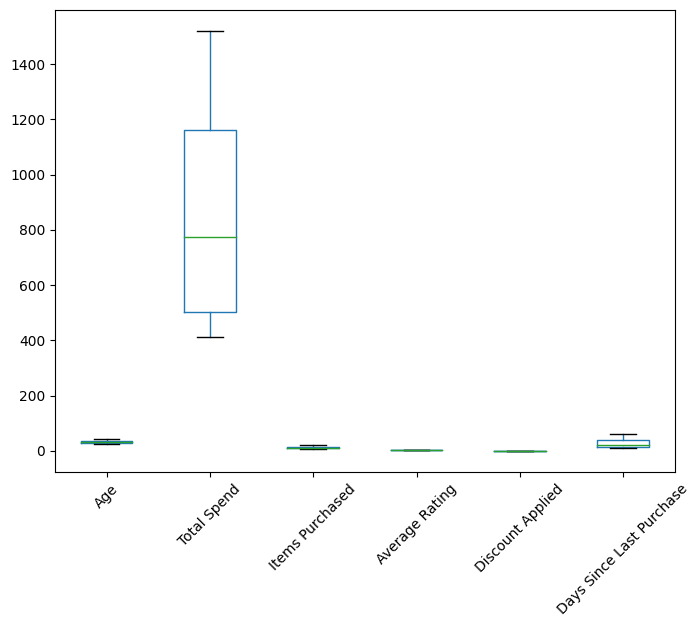

In [445]:
boxplot = df.drop('Customer ID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Dari boxplot yang tertampil diatas menunjukkan bahwa tidak ada tanda-tanda nilai yang berada di luar jangkauan yang biasa (outliers). Sehingga tidak perlu dilakukannya penanganan penghapusan dan imputasi outliers lebih lanjut.

##**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [446]:
def categorize_age(age):
  if age < 18:
    return 'Child'
  elif 18 <= age < 60:
    return 'Adult'
  else:
    return 'Elderly'

df['Age Category'] = df['Age'].apply(categorize_age)

Untuk melakukan ekstraksi fitur baru, salah satu pendekatannya adalah dengan mengklasifikasikan usia ckonsumen e-commerce ke dalam tiga kategori, yakni Child untuk usia di bawah 18 tahun, Adult untuk usia 18 hingga kurang dari 60 tahun, dan Elderly untuk usia 60 tahun ke atas. Selanjutnya, sebuah kolom baru akan dibuat dengan nama Age Category. Tujuannya adalah untuk menyederhanakan analisis data dengan menggantikan nilai usia dengan kategori yang lebih deskriptif.

###**Pengecekkan Hasil**

In [447]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Age Category
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,Adult
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,Adult
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,Adult
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,Adult
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,Adult


Dari tabel diatas telah terbentuk kolom kategorikal baru dengan nama Age Category yang memiliki variasi nilai sesuai dengan patokan usia konsumen sebelumnya

##**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [448]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [449]:
df = df.drop(['Customer ID'], axis=1)

Code di atas bertujuan untuk mengurangi fitur atau kolom yang kurang relevan, yakni kolom Customer ID, kolom ini dihapus karena dalam konteks analisis pola kebiasaan yang dimiliki konsumen di E-Commerce, Hal ini karena ID pelanggan biasanya hanya berupa identifier unik yang tidak berpengaruh signifikan terhadap pola kebiasaan konsumen. Kolom lain yang mungkin lebih relevan atau memiliki dampak yang lebih besar terhadap analisis pola kebiasaan konsumen, sehingga untuk kolom lain tidak diberlakukannya pengapusan

###**Pengecekkan Hasil**

In [450]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Age Category
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,Adult
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,Adult
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,Adult
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,Adult
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,Adult


Dari tabel diatas, terlihat bahwa kolom CustomerID telah terhapus

##**Data Transformating**

###**Mapping**

In [451]:
df['Satisfaction Level'] = df['Satisfaction Level'].map({'Satisfied': 0, 'Neutral': 1,'Unsatisfied': 2}).astype(int)

Pada Code diatas, bertujuan untuk memudahkan identifikasi setiap Tingkat Kepuasan yang dimiliki konsumen dengan menukarkan nilai-nilai kualitatif menjadi nilai numerik tertentu. Dalam hal ini, tingkat kepuasan "Satisfied" direpresentasikan dengan angka 0, "Neutral" dengan angka 1, dan "Unsatified" dengan angka 2

In [452]:
df['Membership Type'] = df['Membership Type'].map({'Gold': 0, 'Silver': 1,'Bronze': 2}).astype(int)

Pada Code diatas, bertujuan untuk memudahkan identifikasi setiap Tipe Membership yang dimiliki konsumen dengan menukarkan nilai-nilai kualitatif menjadi nilai numerik tertentu. Dalam hal ini, tipe membership "Gold" direpresentasikan dengan angka 0, "Silver" dengan angka 1, dan "Bronze" dengan angka 2

In [453]:
df['Age Category'] = df['Age Category'].map({'Children': 0, 'Adult': 1,'Elderly': 2}).astype(int)

Pada Code diatas, bertujuan untuk memudahkan identifikasi setiap Kategori Usia yang dimiliki konsumen dengan menukarkan nilai-nilai kualitatif menjadi nilai numerik tertentu. Dalam hal ini, kategori usia "children" direpresentasikan dengan angka 0, "Adult" dengan angka 1, dan "Elderly" dengan angka 2

In [454]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

Pada Code diatas, bertujuan untuk memudahkan identifikasi Gender yang dimiliki konsumen dengan menukarkan nilai-nilai kualitatif menjadi nilai numerik tertentu. Dalam hal ini, gender "Male" direpresentasikan dengan angka 0, sedangkan untuk "Female" direpresentasikan dengan angka 1

In [455]:
df['Discount Applied'] = df['Discount Applied'].astype(int)

Pada Code diatas, bertujuan untuk memudahkan identifikasi Pemakaian Diskon oleh konsumen e-commerce dengan mengonversi nilai boolean (True/False) menjadi representasi numerik, di mana True direpresentasikan sebagai 1 dan False sebagai 0.

###**Enconding**

Dalam encoding one-hot, setiap kategori dari variabel kategorikal direpresentasikan oleh kolom biner (0 atau 1). Pada daset ini tidak memakai langkah encoding karena nilai dalam kolom sudah berupa nilai numerik dan tidak terdapat variabel kategorikal. Oleh karenanya, dataset yang sudah memenuhi syarat untuk model-machine learning yang akan digunakan, langkah-langkah encoding menjadi tidak diperlukan karena model tersebut dapat menangani variabel numerik tanpa perlu representasi biner tambahan.

###**Pengecekkan**

In [456]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Age Category
0,1,29,New York,0,1120.20,14,4.6,1,25,0,1
1,0,34,Los Angeles,1,780.50,11,4.1,0,18,1,1
2,1,43,Chicago,2,510.75,9,3.4,1,42,2,1
3,0,30,San Francisco,0,1480.30,19,4.7,0,12,0,1
4,0,27,Miami,1,720.40,13,4.0,1,55,2,1


Dari tabel yang terlihat di atas, dapat diamati bahwa beberapa kolom seperti Satisfaction Level, Membership Type, Age Category, Gender, dan Discount Applied awalnya berisi nilai kategorikal, namun telah diubah menjadi nilai numerik dengan representasi angka 0, 1, bahkan 2 untuk masing-masing kategori.

###**Dataframe to CSV**

In [457]:
df.to_csv('Data Cleaned.csv', index=False)

Untuk menyimpan DataFrame yang telah dibersihkan ditahap sebelum-belumnya ke dalam file CSV